Linear Regression R2: 0.5449381659234664
Ridge Regression R2: 0.5449458342338539
Lasso Regression R2: 0.545076817885791
Decision Tree R2: -0.06898287247701007
Random Forest R2: 0.2134987504816288
SVR R2: 0.5218870832760052
KNN Regression R2: 0.45454534101439814


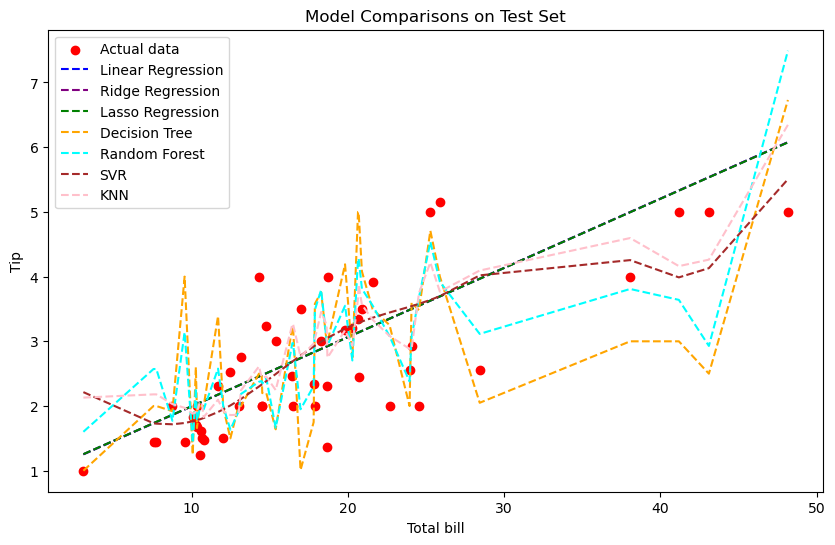

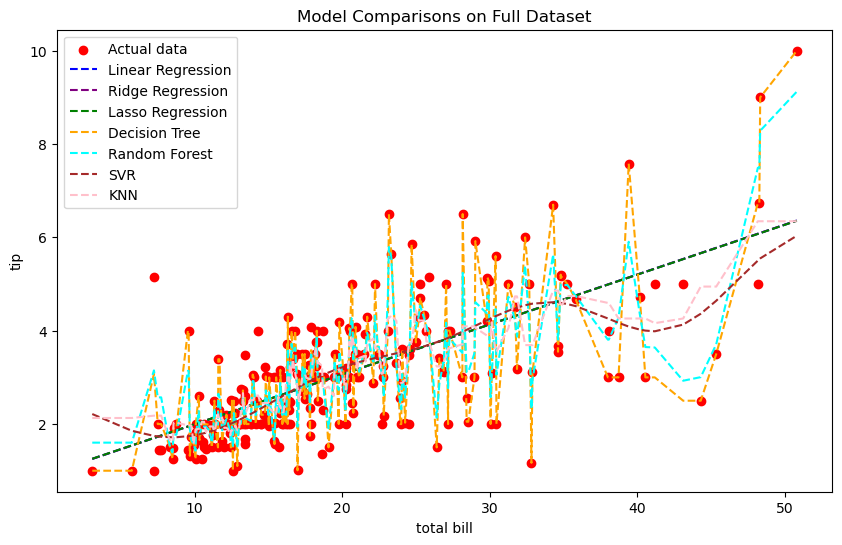

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('tips.csv')
#data.sort_values(by = 'total_bill')
#data.columns[0]

# 'Level' is the feature and 'Salary' is the target

X = data['total_bill'].values   # Features
y = data['tip'].values  # Target

import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

order = np.argsort(X)
X = np.array(X)[order]
y = np.array(y)[order]
X = X.reshape(-1,1)

order = np.argsort(X_test)
X_test = np.array(X_test)[order]
y_test = np.array(y_test)[order]
X_test = X_test.reshape(-1,1)
X_train = X_train.reshape(-1,1)
## **Linear Regression**
#Fits a straight line through the data.

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

## **Ridge Regression**
#Like linear regression but with an L2 regularization term to reduce overfitting

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


## **Lasso Regression**
#Similar to ridge but uses an L1 penalty, which can set some coefficients to zero, effectively performing feature selection.

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))



## **Decision Tree Regression**
#Splits data into regions with similar values, capturing non-linear relationships.

tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))



## **Ensemble Method (Random Forest Regression)**
#An ensemble of decision trees that improves stability and accuracy.

forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


## **Support Vector Regression (SVR)**
#Uses kernels to fit complex patterns.

from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))



## **K-Nearest Neighbors (KNN) Regression**
#Predicts the target by averaging the values of the closest data points.

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


## **Plots**

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')

plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.legend()
plt.show()



## **Check for the whole data**

linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data
knn_reg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)

X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

y_pred_knn = knn_reg.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')

# Plot each model's predictions
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Full Dataset')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.legend()
plt.show()




In [2]:
import numpy as np 
import seaborn as sbn 
import pandas as pd 

In [3]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='tip', ylabel='total_bill'>

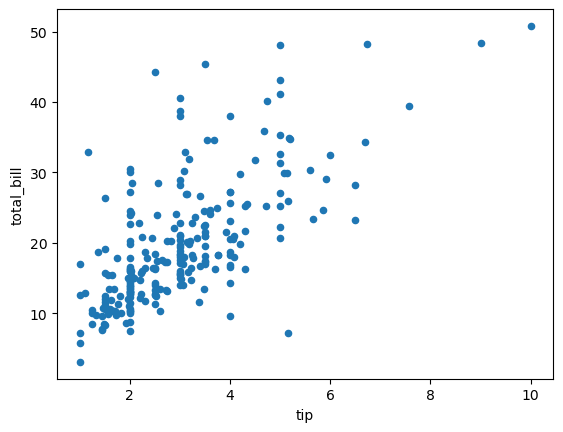

In [4]:
df.plot.scatter('tip','total_bill')

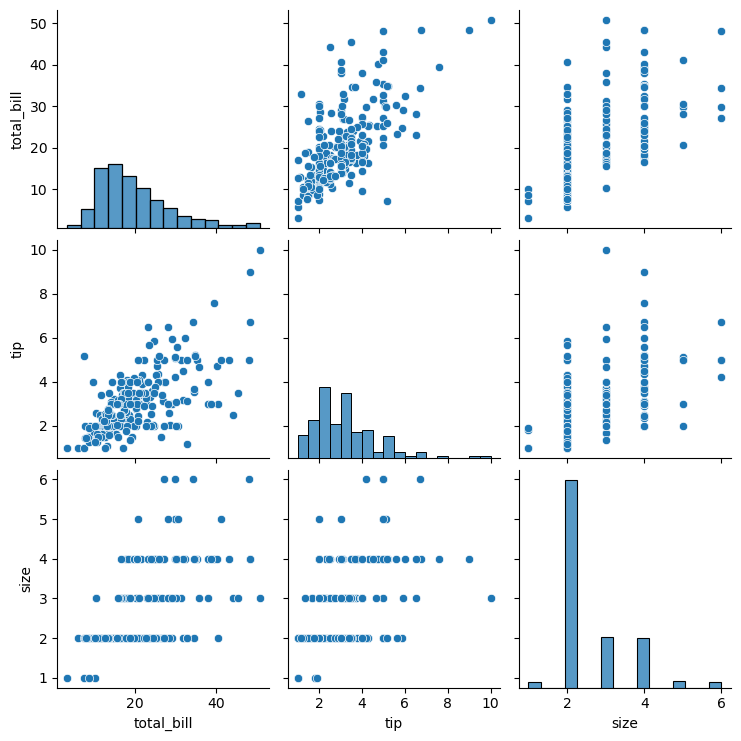

In [5]:
sbn.pairplot(df)

<AxesSubplot:>

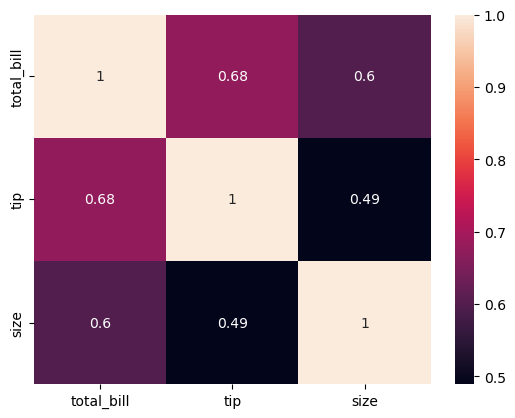

In [ ]:
#!pip install seaborn --upgrade
corr = data.corr()
sbn.heatmap(corr,annot=True)


#The more there is correlation, the more the feature affects the tip. 
# Total bill and size correlation is more. So they can keep a discount on size of members to increase the tip 


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

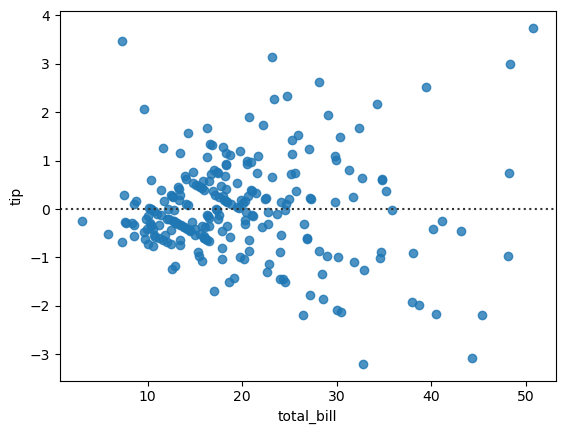

In [7]:
sbn.residplot(x='total_bill', y='tip', data=df)

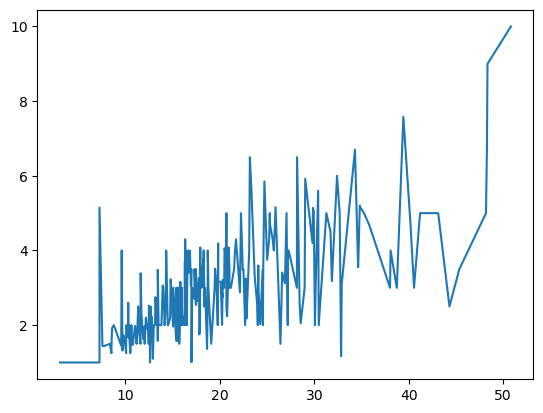

In [8]:
#df.sort_values('total_bill')
#df.plot('total_bill', 'tip')
plt.plot(X,y)

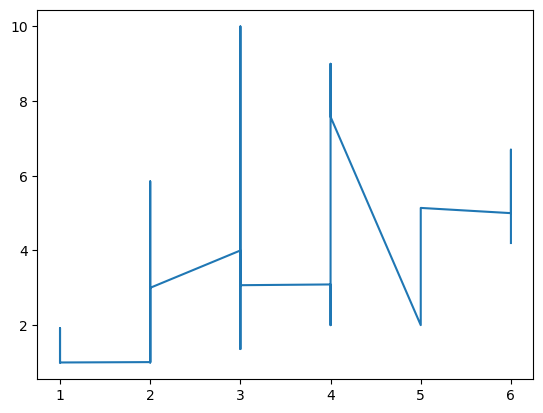

In [9]:
X = df['size'].values
y = df['tip'].values
order = np.argsort(X)
X = np.array(X)[order]
y = np.array(y)[order]
plt.plot(X,y)

<AxesSubplot:xlabel='sex'>

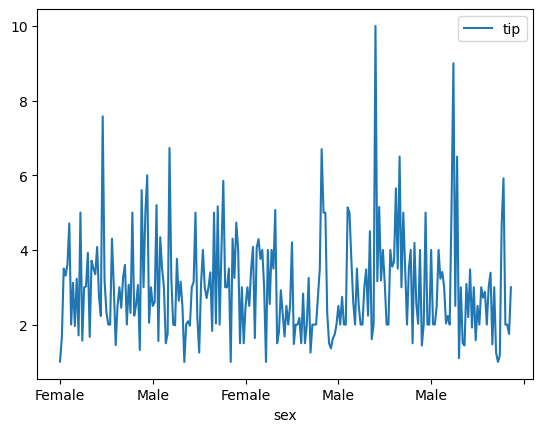

In [10]:
df.plot('sex', 'tip')

<AxesSubplot:xlabel='day'>

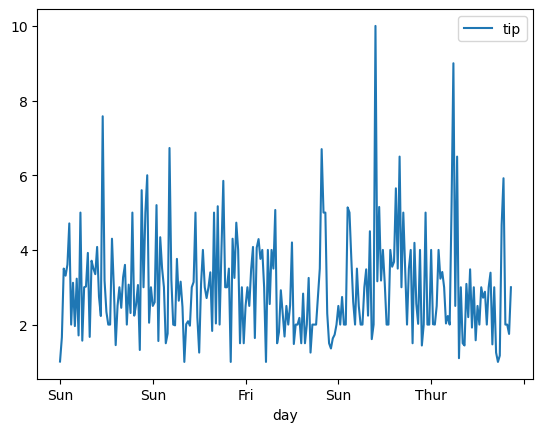

In [11]:
df.plot('day', 'tip')

<AxesSubplot:xlabel='time'>

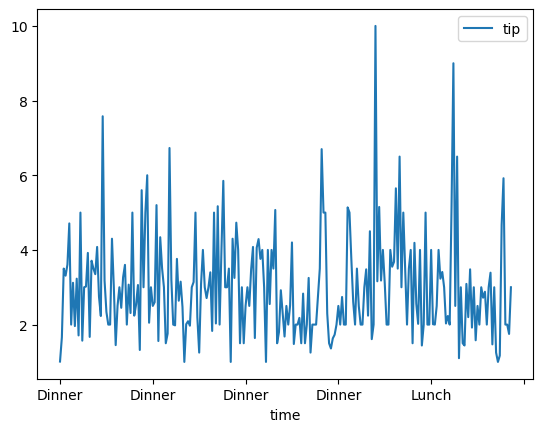

In [12]:
df.plot('time', 'tip')

In [13]:
#Based on the trend in data apply suitable regression method and check model prediction accuracy.
# https://www.influxdata.com/blog/guide-regression-analysis-time-series-data/#:~:text=The%20most%20common%20method%20used,the%20dependent%20and%20independent%20variables.
# https://www.vexpower.com/brief/statistical-tests#:~:text=The%20Rainbow%20test%20is%20useful,the%20true%20model%20is%20linear.

#r2 score is very low for decision tree and random forest


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('tips.csv')
#data.sort_values(by = 'total_bill')
#data.columns[0]

# 'Level' is the feature and 'Salary' is the target
encode = LabelEncoder()
data['sex'] = encode.fit_transform(data['sex'])
data['smoker'] = encode.fit_transform(data['smoker'])
data['day'] = encode.fit_transform(data['day'])
data['time'] = encode.fit_transform(data['time'])
X = data.drop(columns = 'tip').values#data['total_bill'].values   # Features
y = data['tip'].values  # Target

import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



'''
order = np.argsort(X)
X = np.array(X)[order]
y = np.array(y)[order]
X = X.reshape(-1,1)

order = np.argsort(X_test)
X_test = np.array(X_test)[order]
y_test = np.array(y_test)[order]
X_test = X_test.reshape(-1,1)
X_train = X_train.reshape(-1,1)
'''
## **Linear Regression**
#Fits a straight line through the data.

linear_reg = LinearRegression()
linear = linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

## **Ridge Regression**
#Like linear regression but with an L2 regularization term to reduce overfitting

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


## **Lasso Regression**
#Similar to ridge but uses an L1 penalty, which can set some coefficients to zero, effectively performing feature selection.

lasso_reg = Lasso(alpha=0.01)
lasso = lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))



## **Decision Tree Regression**
#Splits data into regions with similar values, capturing non-linear relationships.

tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))



## **Ensemble Method (Random Forest Regression)**
#An ensemble of decision trees that improves stability and accuracy.

forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


## **Support Vector Regression (SVR)**
#Uses kernels to fit complex patterns.

from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))



## **K-Nearest Neighbors (KNN) Regression**
#Predicts the target by averaging the values of the closest data points.

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_ = knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

'''
## **Plots**

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')

plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()



## **Check for the whole data**

linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data
knn_reg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)

X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

y_pred_knn = knn_reg.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')

# Plot each model's predictions
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Full Dataset')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
'''
#######most influenced by total bill and size. 


Linear Regression R2: 0.4441368826121933
Ridge Regression R2: 0.4457879533829945
Lasso Regression R2: 0.4633126386311086
Feature Coefficients from lasso: total_bill    0.093881
sex           0.000000
smoker       -0.147225
day           0.005475
time          0.000000
size          0.228852
dtype: float64
Decision Tree R2: -0.06402275877244601
Random Forest R2: 0.23359000437227717
SVR R2: 0.44183596997406027
KNN Regression R2: 0.3294034029001649


"\n## **Plots**\n\n# Plotting the predictions\nplt.figure(figsize=(10, 6))\nplt.scatter(X_test, y_test, color='red', label='Actual data')\n\nplt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')\nplt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')\nplt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')\nplt.plot(X_test, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')\nplt.plot(X_test, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')\nplt.plot(X_test, y_pred_svr, color='brown', label='SVR', linestyle='--')\nplt.plot(X_test, y_pred_knn, color='pink', label='KNN', linestyle='--')\n\nplt.title('Model Comparisons on Test Set')\nplt.xlabel('Level')\nplt.ylabel('Salary')\nplt.legend()\nplt.show()\n\n\n\n## **Check for the whole data**\n\nlinear_reg.fit(X_train, y_train)\nridge_reg.fit(X_train, y_train)\nlasso_reg.fit(X_train, y_train)\ntree_reg.fit(X_

Feature Coefficients from lasso: total_bill    0.093881
sex           0.000000
smoker       -0.147225
day           0.005475
time          0.000000
size          0.228852
dtype: float64


<AxesSubplot:>

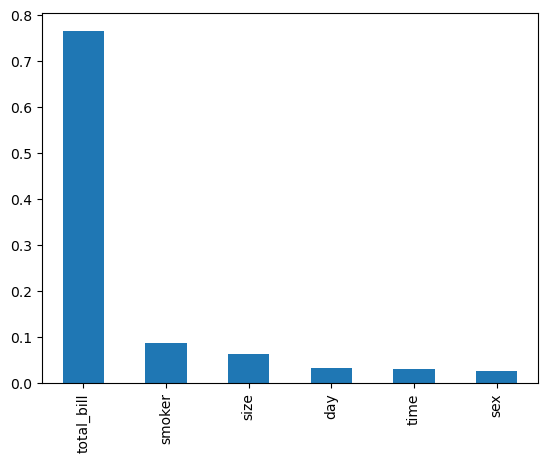

In [ ]:
print(f"Feature Coefficients from lasso: {pd.Series(lasso_reg.coef_, index=data.drop(columns='tip').columns)}")

feature_importances = pd.Series(tree_reg.feature_importances_, index=data.drop(columns='tip').columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
print('output from tree regressor')

In [15]:
####results from tests of residuals and rainbow 


#since residual plot is funnel shaped therefore heteroscedecity ie variance of the results is not constant

#not scattered there model may be missing a non linear relationship 

#as can be seen above the regression models like lasso and ridge are missing non linearity. 

# Knn and SVR perform well on the non linearity of data.  
#R2 for KNN and SVR is .5 which is good. 

In [16]:
###rainbow test
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
ols = sm.OLS(data['total_bill'])
linear_rainbow(ols.fit())
###output is F value and p values if p values is greater than 0.5 than we have to accept the hypothesis that model is linear. 

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:

The more there is correlation, the more the feature affects the tip. Total bill and size correlation is more. So they can keep a discount on size of members to increase the tip 